In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

In [ ]:
dist_loss = {'0.1': [], '0.5': [], "1": {}, '10': {}}
dist_acc = {'0.1': [], '0.5': [], "1": {}, '10': {}}

cent_loss = {'0.1': [], '0.5': [], "1": {}, '10': {}}
cent_acc = {'0.1': [], '0.5': [], "1": {}, '10': {}}

In [ ]:
def extract_data_from_file(file):
    file = Path(file)
    flag = 0
    with file.open('r') as f:
        for row in f:
            if ''

array([1, 2, 3])

In [6]:
import re
from collections import defaultdict
import pprint

def parse_loss_history(filepath):
    """
    Analisa um arquivo de texto para extrair históricos de perda associados a chaves numéricas.

    Args:
        filepath (str): O caminho para o arquivo .txt.

    Returns:
        dict: Um dicionário onde as chaves são os valores de alpha (ex: 0.1, 0.5)
              e os valores são listas de perdas (floats).
    """
    # Usamos defaultdict(list) para que, ao encontrar uma nova chave,
    # uma lista vazia seja criada automaticamente.
    resultados = defaultdict(list)
    chave_atual = None

    # Expressão regular para encontrar as chaves (números no início da linha)
    # ^(\d+\.?\d*) -> Começa com um ou mais dígitos, opcionalmente seguidos por '.' e mais dígitos.
    regex_chave = re.compile(r'^(\d+\.?\d*)')

    # Expressão regular para encontrar os valores de perda
    # :\s*([0-9.e-]+) -> Procura por ':', espaço(s) e captura o número (incluindo notação científica)
    regex_valor = re.compile(r':\s*([0-9.e-]+)')

    with open(filepath, 'r', encoding='utf-8') as f:
        for linha in f:
            # Tenta encontrar uma nova chave na linha
            match_chave = regex_chave.match(linha.strip())
            if match_chave:
                # Se encontrou, atualiza a chave atual
                chave_atual = float(match_chave.group(1))
                continue # Pula para a próxima linha

            # Se já temos uma chave, procura por um valor de perda
            if chave_atual is not None:
                match_valor = regex_valor.search(linha)
                if match_valor:
                    # Se encontrou, extrai, converte para float e adiciona à lista
                    valor_perda = float(match_valor.group(1))
                    resultados[chave_atual].append(valor_perda)

    # Converte o defaultdict de volta para um dict normal para a saída
    return dict(resultados)

# --- Como Usar ---

# Especifique o caminho para o seu arquivo .txt
caminho_do_arquivo = '../history/plots/dist_loss.txt'

# Execute a função de parsing
dados_de_perda = parse_loss_history(caminho_do_arquivo)

# Imprime os resultados de forma legível
print("--- Dicionário de Perdas Extraído ---")
pprint.pprint(dados_de_perda)

# Agora você pode acessar facilmente os dados de cada chave
print("\n--- Exemplo de Acesso ---")
perdas_alpha_0_5 = dados_de_perda.get(0.5, [])
print(f"Número de perdas para alpha=0.5: {len(perdas_alpha_0_5)}")
print(f"Últimos 5 valores de perda para alpha=0.5: {perdas_alpha_0_5[-5:]}")

perdas_alpha_10 = dados_de_perda.get(10.0, [])
print(f"\nNúmero de perdas para alpha=10.0: {len(perdas_alpha_10)}")
print(f"Últimos 5 valores de perda para alpha=10.0: {perdas_alpha_10[-5:]}")

--- Dicionário de Perdas Extraído ---
{0.1: [0.04419045566772082,
       0.04315319860944097,
       0.040377627248349396,
       0.039677723594333816,
       0.03745856344329644,
       0.03773434265800144,
       0.034872520043983224,
       0.03401436198572194,
       0.03207646541713928,
       0.03196065322212551,
       0.02899028795846501,
       0.02850875425042573,
       0.027982374896173893,
       0.02684629111556533,
       0.026176306771935883,
       0.025959218510929843,
       0.025040368856110187,
       0.0248993642581916,
       0.021921752402501077,
       0.022460895295468918,
       0.022591591621778026,
       0.018518416407685843,
       0.021221334519593613,
       0.02023982742558355,
       0.021013839644674927,
       0.018892867594772243,
       0.019532914487471492,
       0.017550795715047706,
       0.02052282324488859,
       0.019837903680268283,
       0.018565950186356255,
       0.018484509879757898,
       0.0191328547756124,
       0.017311310175

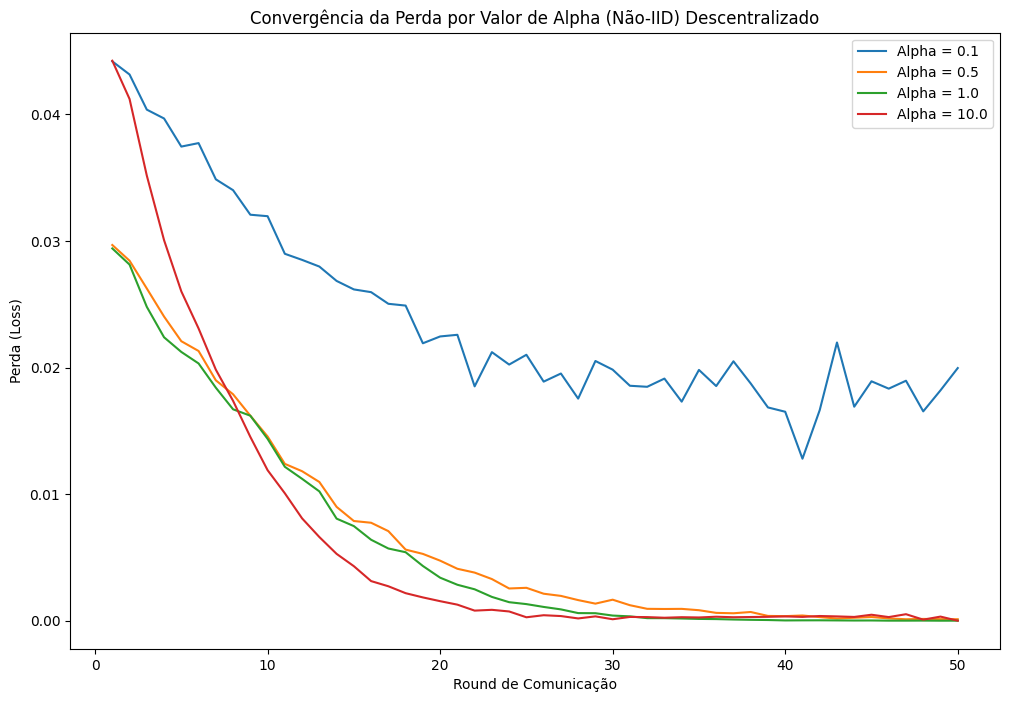

In [9]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(12, 8))

# 3. Itere sobre o dicionário para plotar cada curva
for alpha, losses in dados_de_perda.items():
    # Cria o eixo X (rounds), que vai de 1 até o número de perdas
    rounds = np.arange(1, len(losses) + 1)
    
    # --- PASSO CHAVE 1: Adicione o argumento 'label' ---
    # Usamos uma f-string para criar um rótulo descritivo para cada curva
    ax.plot(rounds, losses, label=f'Alpha = {alpha}')

# --- Dicas para um Gráfico Melhor ---
ax.set_title('Convergência da Perda por Valor de Alpha (Não-IID) Descentralizado')
ax.set_xlabel('Round de Comunicação')
ax.set_ylabel('Perda (Loss)')
ax.legend()

--- Dicionário de Acurácia Extraído com Sucesso ---
{0.1: [0.09161490683229814,
       0.23796583850931677,
       0.2327251552795031,
       0.24553571428571427,
       0.296583850931677,
       0.33229813664596275,
       0.40062111801242234,
       0.38412267080745344,
       0.4718555900621118,
       0.453027950310559,
       0.48214285714285715,
       0.4734083850931677,
       0.48350155279503104,
       0.484860248447205,
       0.4924301242236025,
       0.501358695652174,
       0.5102872670807453,
       0.5405667701863354,
       0.501358695652174,
       0.5166925465838509,
       0.5395962732919255,
       0.547166149068323,
       0.5574534161490683,
       0.577639751552795,
       0.6005434782608695,
       0.5764751552795031,
       0.5675465838509317,
       0.624805900621118,
       0.5753105590062112,
       0.5650232919254659,
       0.6069487577639752,
       0.6083074534161491,
       0.6071428571428571,
       0.609666149068323,
       0.6020962732919255,
    

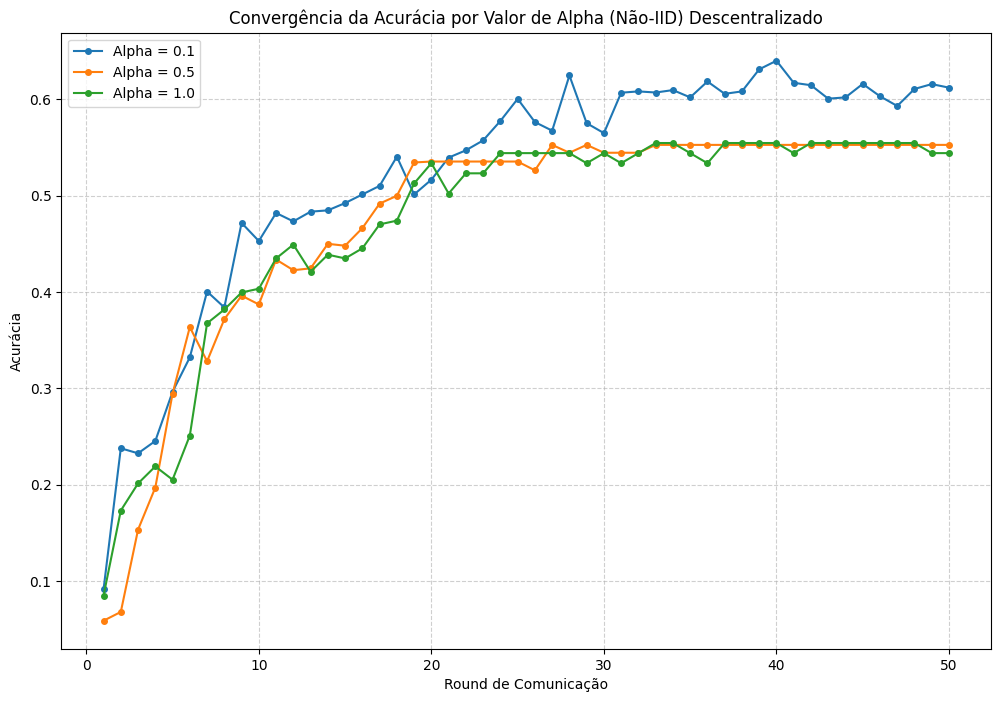

In [10]:
import ast
import re
import matplotlib.pyplot as plt
import numpy as np
import pprint

def parse_accuracy_file_corrigido(filepath):
    """
    Versão corrigida que analisa corretamente as chaves e os dicionários
    em formato de string do arquivo de texto.
    """
    resultados = {}
    string_do_dict_atual = ""
    chave_atual = None

    # Regex para encontrar uma chave numérica no início da linha e capturar o resto
    regex_chave = re.compile(r'^\s*(\d+\.?\d*)\s*(.*)')

    try:
        with open(filepath, 'r', encoding='utf-8') as f:
            for linha in f:
                # Tenta encontrar o padrão da chave no início da linha
                match = regex_chave.match(linha)
                
                if match:
                    # Se encontrou uma chave, primeiro processe o bloco anterior
                    if chave_atual is not None and string_do_dict_atual:
                        try:
                            # Converte a string acumulada em um dicionário real
                            dict_parseado = ast.literal_eval(string_do_dict_atual)
                            lista_de_tuplas = dict_parseado.get('accuracy', [])
                            # Extrai apenas os valores de acurácia
                            resultados[chave_atual] = [acuracia for round_num, acuracia in lista_de_tuplas]
                        except (ValueError, SyntaxError) as e:
                            print(f"AVISO: Erro ao processar o bloco para a chave {chave_atual}: {e}")

                    # Agora, redefine para a nova chave encontrada
                    chave_atual = float(match.group(1))
                    # O início do novo dicionário é o resto da linha atual
                    string_do_dict_atual = match.group(2).strip()
                else:
                    # Se não for uma nova chave, apenas continue acumulando a string
                    if chave_atual is not None:
                        string_do_dict_atual += linha.strip()

            # Não se esqueça de processar o último bloco de dicionário após o fim do loop
            if chave_atual is not None and string_do_dict_atual:
                try:
                    dict_parseado = ast.literal_eval(string_do_dict_atual)
                    lista_de_tuplas = dict_parseado.get('accuracy', [])
                    resultados[chave_atual] = [acuracia for round_num, acuracia in lista_de_tuplas]
                except (ValueError, SyntaxError) as e:
                    print(f"AVISO: Erro ao processar o último bloco para a chave {chave_atual}: {e}")

    except FileNotFoundError:
        print(f"Erro: O arquivo '{filepath}' não foi encontrado.")
        return None
        
    return resultados

# --- 1. Use a NOVA função de parsing ---
caminho_do_arquivo = '../history/plots/dist_accuracy.txt'
dados_de_acuracia = parse_accuracy_file_corrigido(caminho_do_arquivo)

# Se o parsing foi bem-sucedido e o dicionário não está vazio
if dados_de_acuracia:
    print("--- Dicionário de Acurácia Extraído com Sucesso ---")
    pprint.pprint(dados_de_acuracia)

    # --- 2. GERAÇÃO DO GRÁFICO (Código idêntico ao anterior) ---
    fig, ax = plt.subplots(figsize=(12, 8))
    for alpha, accuracies in dados_de_acuracia.items():
        rounds = np.arange(1, len(accuracies) + 1)
        ax.plot(rounds, accuracies, marker='o', linestyle='-', markersize=4, label=f'Alpha = {alpha}')
    ax.set_title('Convergência da Acurácia por Valor de Alpha (Não-IID) Descentralizado')
    ax.set_xlabel('Round de Comunicação')
    ax.set_ylabel('Acurácia')
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend()
    plt.show()

In [16]:
dados_de_acuracia

{}